In [45]:
import pandas as pd
import seaborn as sns

sns.set()

In [46]:
df = pd.read_csv('output.csv')
df["Correctness"] = df["Correctness"].map({0: "Incorrect", 1:"Correct"})
df['Correctness'] = pd.Categorical(df['Correctness'],
                                   categories=["Correct", "Incorrect"],
                                   ordered=True)
df['Order Difference'] = pd.Categorical(df['Order Difference'],
                                   categories=[-1, 0, 1],
                                   ordered=True)
df['Question ID'] = pd.Categorical(df['Question ID'],
                                   categories=sorted(df['Question ID'].value_counts().keys()),
                                   ordered=True)
df["Given-Expected Answer Pair"] = df.apply(lambda row:(row["Answer"], row["Correct Answer"]), axis=1)
# df["Given-Expected Answer Pair"] = pd.Categorical(df["Given-Expected Answer Pair"],
#                                                   categories=sorted(df["Given-Expected Answer Pair"].value_counts().keys()),
#                                                   ordered=True)

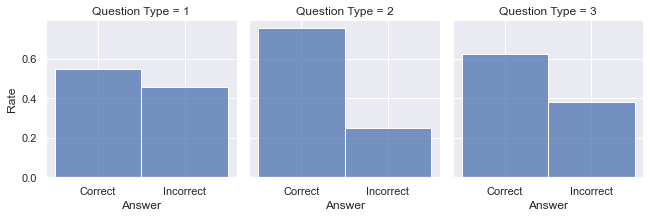

In [47]:
g = sns.FacetGrid(df, col = "Question Type")
graph = g.map_dataframe(sns.histplot, x = "Correctness", stat="probability")
graph.set_xlabels("Answer")
graph.set_ylabels("Rate")

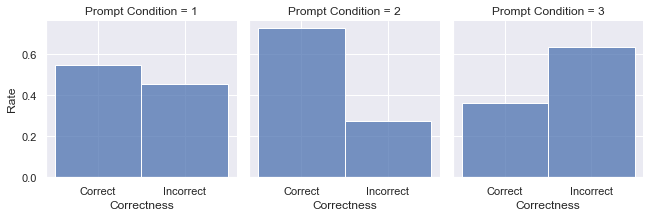

In [48]:
g = sns.FacetGrid(df[df["Question Type"] == 1], col = "Prompt Condition")
graph = g.map_dataframe(sns.histplot, x = "Correctness", stat="probability")
graph.set_xlabels("Correctness")
graph.set_ylabels("Rate")

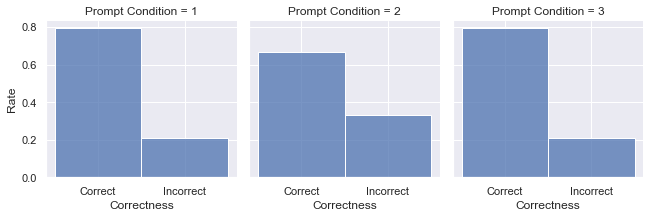

In [49]:
g = sns.FacetGrid(df[df["Question Type"] == 2], col = "Prompt Condition")
graph = g.map_dataframe(sns.histplot, x = "Correctness", stat="probability")
graph.set_xlabels("Correctness")
graph.set_ylabels("Rate")

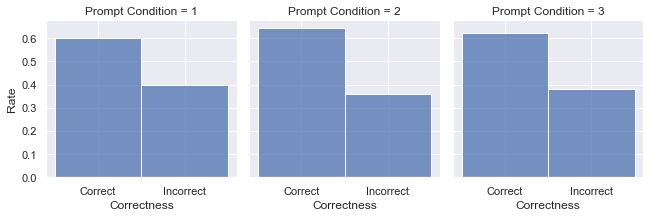

In [50]:
g = sns.FacetGrid(df[df["Question Type"] == 3], col = "Prompt Condition")
graph = g.map_dataframe(sns.histplot, x = "Correctness", stat="probability")
graph.set_xlabels("Correctness")
graph.set_ylabels("Rate")

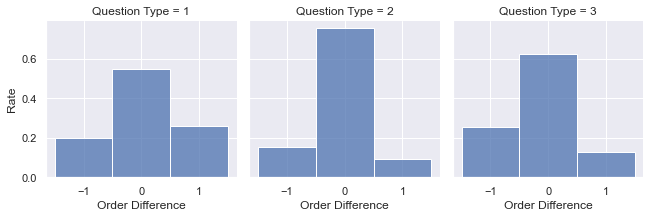

In [51]:
g = sns.FacetGrid(df, col = "Question Type")
graph = g.map_dataframe(sns.histplot, x = "Order Difference", stat="probability")
graph.set_xlabels("Order Difference")
graph.set_ylabels("Rate")

In [ ]:
g = sns.FacetGrid(df[df["Question Type"] == 1], col = "Question ID", col_wrap=6)
graph = g.map_dataframe(sns.histplot, x = "Correctness", stat="probability")
graph.set_xlabels("Correctness")
graph.set_ylabels("Rate")


In [ ]:
g = sns.FacetGrid(df[df["Question Type"] == 2], col="Question ID", col_wrap=6)
graph = g.map_dataframe(sns.histplot, x="Correctness", stat="probability")
graph.set_xlabels("Answer")
graph.set_ylabels("Rate")

In [ ]:
g = sns.FacetGrid(df[df["Question Type"] == 3], col="Question ID", col_wrap=6)
graph = g.map_dataframe(sns.histplot, x="Correctness", stat="probability")
graph.set_xlabels("Answer")
graph.set_ylabels("Rate")

In [ ]:
g = sns.FacetGrid(df[df["Correct Answer"] == "Neither"], col = "Given-Expected Answer Pair", col_wrap=1, aspect=4.5,
                 col_order=sorted(df[df["Correct Answer"] == "Neither"]["Given-Expected Answer Pair"].value_counts().keys()))
graph = g.map_dataframe(sns.histplot, x = "Question ID", stat="count")
graph.set_xlabels("Answer")
graph.set_ylabels("Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Add a title for the entire plot
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Given-Expected Answer Pair")

        Answer Correct Answer
0         Both           Both
1    Collected      Collected
2    Collected         Shared
3    Collected      Collected
4    Collected           Both
..         ...            ...
175    Neither      Collected
176  Collected      Collected
177     Shared      Collected
178       Both      Collected
179     Shared      Collected

[66 rows x 2 columns]


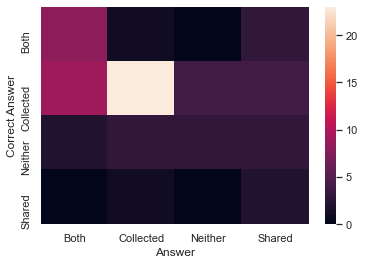

In [76]:
t1 = pd.read_csv('output.csv', usecols = [4, 5, 6])
t1 = t1[t1["Question Type"] == 1]
t1 = t1.drop("Question Type", 1)
t1.apply(lambda x: x.factorize()[0]).corr()
g = sns.heatmap(pd.crosstab(t1["Correct Answer"], t1["Answer"]))

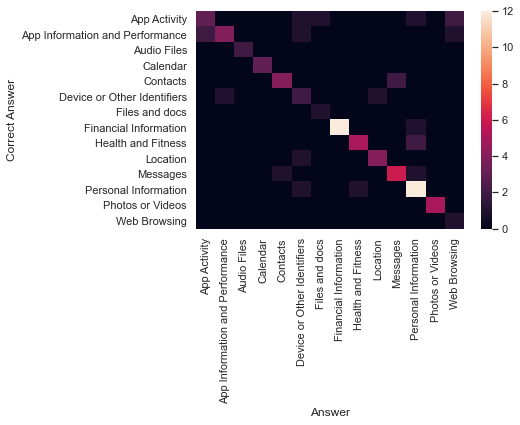

In [77]:
t2 = pd.read_csv('output.csv', usecols = [4, 5, 6])
t2 = t2[t2["Question Type"] == 2]
t2 = t2.drop("Question Type", 1)
t2.apply(lambda x: x.factorize()[0]).corr()
g = sns.heatmap(pd.crosstab(t2["Correct Answer"], t2["Answer"]))

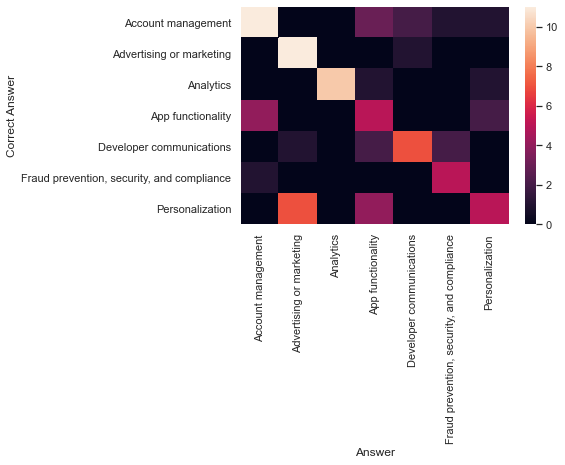

In [79]:
t3 = pd.read_csv('output.csv', usecols = [4, 5, 6])
t3 = t3[t3["Question Type"] == 3]
t3 = t3.drop("Question Type", 1)
t3.apply(lambda x: x.factorize()[0]).corr()
g = sns.heatmap(pd.crosstab(t3["Correct Answer"], t3["Answer"]))